# Seattle AirBNB Dataset Analysis

In this notebook, we will be taking a look at AirBNB data for listings in the Seattle, Washington area. The data consists of three csv files:
1. reviews.csv: Contains information regarding reviews (such as comments, review date, basic reviewer info), sorted by lisitng_id.
2. listings.csv: Contains information regarding the listings in the Seattle, Washington area. Contains ~90 columns.
3. calendar.csv: Contains information regarding listing availability and pricing.

We will look at the individual tables and figure out what kind of questions we want to ask.

## Part 1: Exploring the Data

Here, we will load the data into 3 separate dataframes and seeing what data we have to work with.

In [1]:
# importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

In [2]:
# Loading reviews.csv into a dataframe
df_reviews = pd.read_csv('reviews.csv')

df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [3]:
# Loading listings.csv into a dataframe 
df_listings = pd.read_csv('listings.csv')

df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
# Loading calendar.csv into a dataframe
df_calendar = pd.read_csv('calendar.csv')

df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


Let's tkae a look at the sizes of each of these dataframes, and the column names for df_listings (since the df.head preview doesn't show all the columns)

In [5]:
# pritning the shapes of our dataframes
print("The shape of df_reviews is", df_reviews.shape[0], "rows and", df_reviews.shape[1], "columns.")
print("The shape of df_listings is", df_listings.shape[0], "rows and", df_listings.shape[1], "columns.")
print("The shape of df_calendar is", df_calendar.shape[0], "rows and", df_calendar.shape[1], "columns.")

The shape of df_reviews is 84849 rows and 6 columns.
The shape of df_listings is 3818 rows and 92 columns.
The shape of df_calendar is 1393570 rows and 4 columns.


In [6]:
# Get the names of all the columns in our listings dataframe
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

It's time we start asking some questions about the data. Since we're dealing with review data, the firt thing to come to mind is "Do these columns have the abiltiy to accurately predict the rating of a listing." Let's see if we can create a model that will answer that question.

## Part 2: Cleaning the Data

Now that we have a question we want to ask, we can start the process of cleaning the data and preparing it to be fed into a model. For reasons explained later, we will only be using "listings" dataframe.

### 2.1 Checking for Nulls

As nice as it would be to throw the data as-is into a model, there are some realities to face, namely that the dataset will likely have nulls. Another thing to take into account is that we have a lot of features, but our dataframe has ~3800 rows of data. If we do properly treat our null values and do one-hot encoding on categorical columns we wish to include in our dataset, we will likely find that our data will be sparse.

Let's take a look at a description of our columns:

In [7]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


Again, since we have 92 columns, we won't be able to see all the statistics for all the columns. Let's actually start by calculating how many columns have a proportion of nulls:

In [8]:
no_null_count = np.sum(np.sum(df_listings.isnull())/df_listings.shape[0] == 0)
null_25_count = np.sum(np.sum(df_listings.isnull())/df_listings.shape[0] > 0.25)
null_50_count = np.sum(np.sum(df_listings.isnull())/df_listings.shape[0] > 0.50)
null_75_count = np.sum(np.sum(df_listings.isnull())/df_listings.shape[0] > 0.75)

print("There are", no_null_count, "columns without any nulls")
print("There are", null_25_count, "columns with 25% or more of the values null")
print("There are", null_50_count, "columns with 50% or more of the values null")
print("There are", null_75_count, "columns with 75% or more of the values null")

There are 47 columns without any nulls
There are 8 columns with 25% or more of the values null
There are 4 columns with 50% or more of the values null
There are 2 columns with 75% or more of the values null


We see that there are 4 columns with over half of the values null, and of those 4, 2 have 75% or more of their values missing. Let's see which these are, and if they're relevant for answering our question:

In [9]:
# this will generate a series of the proportion of null values per column
null_series = np.sum(df_listings.isnull())/df_listings.shape[0]

# we iterate over this series to return columns with a proportion > 0.5
for index, value in null_series.items():
    if value > 0.5:
        print(f"Column: {index}, Value: {value}")

Column: square_feet, Value: 0.9745940282870613
Column: monthly_price, Value: 0.6026715557883708
Column: security_deposit, Value: 0.5112624410686223
Column: license, Value: 1.0


It looks like the square_feet and liscense columns have an increadibly high proportion of null values. AS such, we can't really include them in our model.

Furthermore, we can probably explain the high null proportion in monthly_price because listings on Airbnb are more likely to be-short term (because users of AirBNB are more likely to rent a place for short-term). We won't be using this column either.

Security_deposit has slightly over 50% of its values null, which we can interpret as that proportion of listings not requiring a security deposit to rent the space. While we may find the null values to be problematic if we wanted to use this column, we can actually create a column from security_deposit that's a binary that will measure whether a listing requires a security deposit or not.

Let's drop the columns that we said we will drop.

In [10]:
df_reduced = df_listings.drop(['square_feet', 'monthly_price', 'license'], axis=1)

And let's add the binary security_deposit column:

In [11]:
df_reduced['security_deposit_binary'] = df_reduced['security_deposit'].apply(lambda x: x == np.nan)

In [12]:
df_reduced['security_deposit_binary']

0       False
1       False
2       False
3       False
4       False
        ...  
3813    False
3814    False
3815    False
3816    False
3817    False
Name: security_deposit_binary, Length: 3818, dtype: bool

In [13]:
df_reduced.shape

(3818, 90)

We can see that we are down to 90 columns, from our original 92 (we dropped 3 then added 1)

We should also count the number of nulls in our target column: review_scores_value

In [14]:
# count nulls in our target column
df_reduced['review_scores_rating'].isnull().sum()

647

Removing nulls from this column will be unavoidable, since this is our Target column. 

### 2.2 Choosing our Feature Set

I think now we should further narrow down the amount of features we're going to use for our model. Let's bring up the column names again.

In [15]:
df_reduced.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

Some things to note:
1. We don't really need to keep the geolocational data since the data is already focused on Seattle, Washington (We could keep zipcode since Seattle has multiple zipcode, but for now we will try to use fewer columns for our model).
2. Since we will already be including price as a predictive column, including other price-related columns (weekly_price, monthly_price) would likely lead to colinearity among our columns.

With this in mind, let's create a new version of our dataframe that's just the columns we want to use for our model.

In [16]:
df_condensed = df_reduced[['review_scores_rating', 'review_scores_cleanliness', 
                           'review_scores_communication', 'review_scores_location',
                           'host_acceptance_rate', 'cancellation_policy', 
                           'host_response_time', 'host_response_rate', 
                           'price', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights']]

Let's take a look at the datatypes for our columns, to make sure that everything makes sense moving forward:

In [17]:
df_condensed.dtypes

review_scores_rating           float64
review_scores_cleanliness      float64
review_scores_communication    float64
review_scores_location         float64
host_acceptance_rate            object
cancellation_policy             object
host_response_time              object
host_response_rate              object
price                           object
bathrooms                      float64
bedrooms                       float64
beds                           float64
minimum_nights                   int64
dtype: object

Hmm....it looks like a few of our columns are objects when they should be ints/floats, mainly price and host_response_rate.

In [18]:
df_condensed['price']

0        $85.00
1       $150.00
2       $975.00
3       $100.00
4       $450.00
         ...   
3813    $359.00
3814     $79.00
3815     $93.00
3816     $99.00
3817     $87.00
Name: price, Length: 3818, dtype: object

In [19]:
df_condensed['host_response_rate']

0        96%
1        98%
2        67%
3        NaN
4       100%
        ... 
3813     99%
3814    100%
3815     NaN
3816    100%
3817    100%
Name: host_response_rate, Length: 3818, dtype: object

It looks like we're going to have to do some processing on these columns to be the right data types:

In [20]:
df_condensed['price'] = df_condensed['price'].replace('[\$,]', '', regex=True).astype(float)

C:\Users\Hersh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_condensed['host_response_rate'] = (df_condensed['host_response_rate'].replace('[\%]', '', regex=True).notnull()).astype(int)

C:\Users\Hersh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df_condensed['price']

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

So now that we've successfulyl converted this column, let's take a look at some stats regardign these columns.

First, we'll look at the distributions of our columns using histograms:

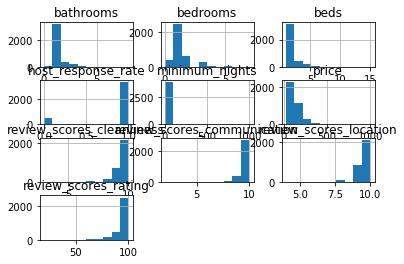

In [23]:
df_condensed.hist();

Looks like we may need to normalize our data a bit before feeding it into the model. While this will reduce our abiltiy to explain the relationships of the model, it will help the data better fit.

Now let's see a correlation heatmap of our columns:

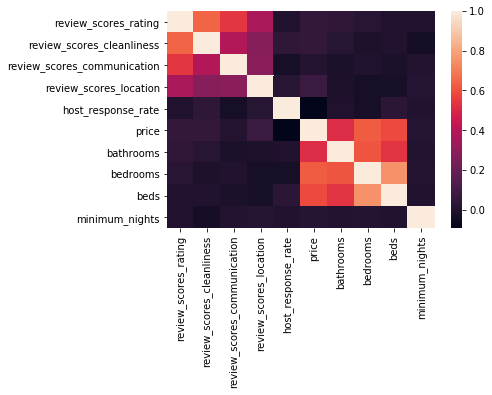

In [24]:
sns.heatmap(df_condensed.corr())

We can see that there is actually some correlation between the number of bedrooms and the number of beds, which makes sense. A higher numebr of bedrooms means a higher number of beds, so we will omit the "beds" column from df_condensed:

In [25]:
df_condensed = df_condensed.drop(['beds'], axis=1)

For good measure, we'll check the columns to see if we successfully dropped 'beds'

In [26]:
df_condensed.columns

Index(['review_scores_rating', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'host_acceptance_rate', 'cancellation_policy', 'host_response_time',
       'host_response_rate', 'price', 'bathrooms', 'bedrooms',
       'minimum_nights'],
      dtype='object')

### 2.3 Further Data Cleaning

Now that we have our final list of columns, we have just a few more steps before the data are ready to be fed into out model:
1. We need to remove nulls from our target column ('review_scores_rating')
2. We need to one-hot encode our categorical columns
3. We need to impute values for the nulls in our numerical columns

Thankfully, we can create a function that will automate most of this stuff for us. That way, we won't need to manually do these things to our columns one at a time.

In [27]:
def clean_data(df):
    '''
    This function will take the dataframe, separate the columns 
    by data type and treat them as needed
    '''
    
    # drop null values from target column and assign it to y varaible:
    df = df.dropna(subset=['review_scores_rating'], axis=0)
    y = df['review_scores_rating']
    
    # drop the target column from our dataframe since it's saved to a variable
    df = df.drop(['review_scores_rating'], axis=1)
    
    #separate numeric variables and process them
    numeric_vars = df.select_dtypes(include=['int', 'float'])
    for col in numeric_vars:
        df[col].fillna((df[col].mean()), inplace = True)
    
    #separate categorical variables and process them
    categorical_vars = df.select_dtypes(include=['object'])
    for col in categorical_vars:
        df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep = '_', drop_first=True)], axis=1)
    
    # save the newly cleaned data to an X-variable
    X = df
    
    return X, y

In [28]:
X, y = clean_data(df_condensed)

In [29]:
# pritning the dimensions for our X and y variables
print(X.shape)
print(y.shape)

(3171, 14)
(3171,)


### 2.4 Fitting the model

It looks like we successfully cleaned the data and separated them into our dependent/independent variables. Now we can feed them to our model. Let's choose to use a multi-variable regression to fit the data:

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

lm = LinearRegression(normalize=True) # Instantiate the model and normalize the data
lm.fit(X_train, y_train) # fit the model

# Predict test values and score the model on test data
y_test_preds = lm.predict(X_test)
y_train_preds = lm.predict(X_train)

r2_score_test = r2_score(y_test, y_test_preds)
r2_score_train = r2_score(y_train, y_train_preds)

In [32]:
print('Our model\'s r2 score on test data is:', r2_score_test)
print('Our model\'s r2 score on training data is:', r2_score_train)

Our model's r2 score on test data is: 0.5120955444227264
Our model's r2 score on training data is: 0.5378028497868456


Our model has an r2 score of 0.51, which means that it can only really explain 51% of the variacne in the data. It's pretty similar to the r2 score on our training data, which is 0.53. But this means that our model's predictive power is not too much better than predicting using the mean.

## Part 3: Conclusions and Reflections

In retrospect, there were a lot of things that we could have done during the feature selection to have chosen better-fitting features for the model. For example, the heatmap we made showed that a lot of features we chose had little to no correlation with the target varaible, that should have set off some warning that we should have reconsidered our feature set.